#LSTM과 GRU셀
##IT융합자율학부 201814076 권혁준

##기분 순환 층의 한계
- 기본 순환 층은 긴 시퀀스 학습이 어려움
  - 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석
  - 멀리 떨어져 있는 단어 정보를 인식하는데 어려움

##LSTM(Long Short-Term Memory)
- 단기 기억을 오래 기억하기 위해 고안된 순환 층
  - 2개의 상태(은닉 상태, 셀 상태)를 순환 시켜 구현
- 은닉 상태 계산
 - 입력(x)와 이전 타임스텝의 은닉 상태(h)를 가중치(wo)에 곱한 후 활성화 함수(sigmoid)를 통과 시킨 값 ①
 - 활성화 함수(tanh)를 통과한 어떤 값 ②
 - ①과 ②를 곱하여 새로운 은닉 상태(hf)를 계산
 ------
- 셀 상태 cell state
  - 다음 층으로 전달되지 않고 LSTM 셀에서만 순환되는 값
- 셀 상태 계산
 - 입력(x)와 이전 타임스텝의 은닉 상태(h)에 새로운 가중치(wf)를 곱한 후 활성화 함수(sigmoid)를 통과시킨 값 ③
 - 입력(x)와 이전 타임스텝의 은닉 상태(h)에 새로운 가중치(wi)를 곱한 후 활성화 함수(sigmoid)를 통과시킨 값 ④
 - 입력(x)와 이전 타임스텝의 은닉 상태(h)에 새로운 가중치(wj)를 곱한 후 활성화 함수(tanh)를 통과시킨 값 ⑤
 - 이전 타임스텝의 셀 상태에 ④를 곱한 값에 ④와 ⑤를 곱한 값을 더하여 현재 타임스텝의 새로운 셀 상태를 계산
- 4개의 셀(wf, wi, wj, wo)로 구성
- 3개의 게이트(곱셈 연산)
  - 삭제 게이트: 셀 상태에 있는 정보를 제거하는 역할
  - 입력 게이트: 새로운 정보를 셀 상태에 추가하는 역할
  - 출력 게이트: 셀 상태를 다음 은닉 상태로 출력하는 역할

##LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 39ms/step - loss: 0.6928 - accuracy: 0.5218 - val_loss: 0.6924 - val_accuracy: 0.5412
Epoch 2/100
 13/313 [>.............................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5589

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 10ms/step - loss: 0.6920 - accuracy: 0.5601 - val_loss: 0.6914 - val_accuracy: 0.5774
Epoch 3/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6904 - accuracy: 0.5896 - val_loss: 0.6890 - val_accuracy: 0.6092
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6867 - accuracy: 0.6190 - val_loss: 0.6838 - val_accuracy: 0.6342
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6758 - accuracy: 0.6442 - val_loss: 0.6654 - val_accuracy: 0.6138
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6343 - accuracy: 0.6817 - val_loss: 0.6144 - val_accuracy: 0.7152
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5964 - accuracy: 0.7254 - val_loss: 0.5895 - val_accuracy: 0.7252
Epoch 8/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5713 - accuracy: 0.7448 - val_loss: 0.5661 - val_accuracy: 0.7468
Epoch

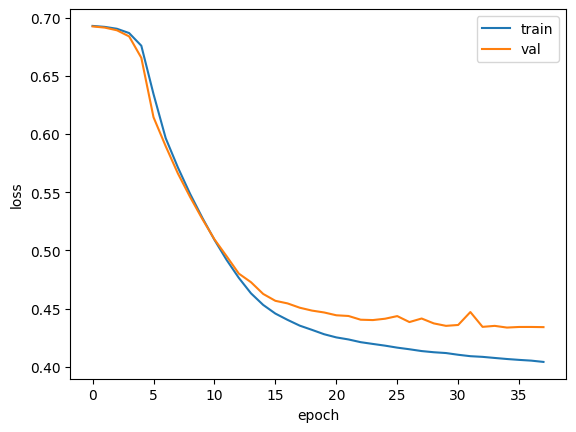

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##순환층에 드롭아웃 적용하기

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 25ms/step - loss: 0.6928 - accuracy: 0.5219 - val_loss: 0.6925 - val_accuracy: 0.5320
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6918 - accuracy: 0.5582 - val_loss: 0.6910 - val_accuracy: 0.5822
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6894 - accuracy: 0.5965 - val_loss: 0.6869 - val_accuracy: 0.6400
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6795 - accuracy: 0.6544 - val_loss: 0.6639 - val_accuracy: 0.6944
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6361 - accuracy: 0.6869 - val_loss: 0.6168 - val_accuracy: 0.6996
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6078 - accuracy: 0.7042 - val_loss: 0.5952 - val_accuracy: 0.7224
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5884 - accuracy: 0.7212 - val_loss: 0.5757 - val_accuracy: 0.

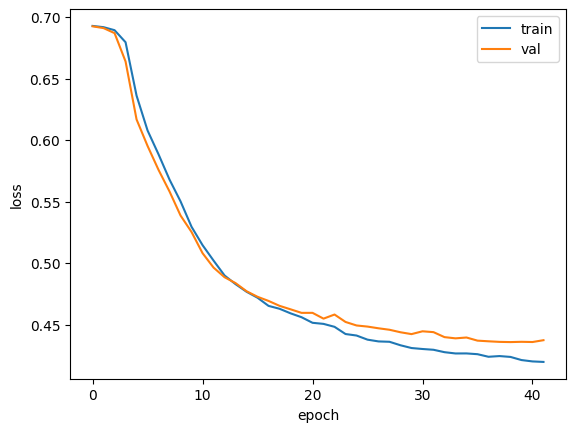

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##순환 층을 쌓은 순환 신경망 구현
- 순환 층의 은닉 상태는 시퀀스의 마지막 타입스텝에 대한 은닉 상태만 다음 층으로 출력
- 순환 층을 쌓는 경우 모든 순환 층에 순차 데이터가 필요하기 때문에 앞선 순환 층의 모든 타입스텝에 대한 은닉 상태를 출력 해야함

##2개의 층을 연결하기

In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 25ms/step - loss: 0.6928 - accuracy: 0.5256 - val_loss: 0.6924 - val_accuracy: 0.5808
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6915 - accuracy: 0.5750 - val_loss: 0.6899 - val_accuracy: 0.6138
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6858 - accuracy: 0.6202 - val_loss: 0.6772 - val_accuracy: 0.6486
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6479 - accuracy: 0.6615 - val_loss: 0.5963 - val_accuracy: 0.7008
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5689 - accuracy: 0.7139 - val_loss: 0.5418 - val_accuracy: 0.7248
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5327 - accuracy: 0.7393 - val_loss: 0.5150 - val_accuracy: 0.7484
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5131 - accuracy: 0.7526 - val_loss: 0.4984 - val_accuracy

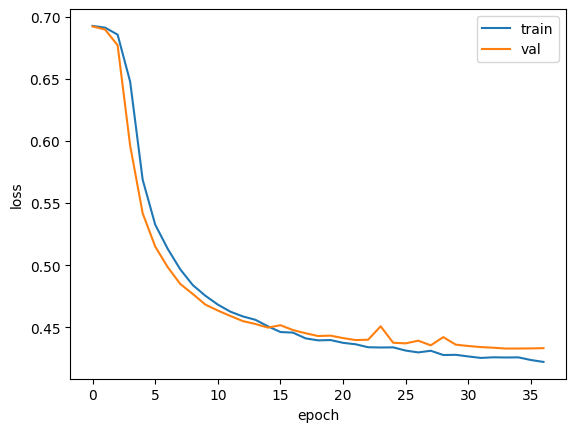

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

##GRU(Gated Recurrent Unit) 셀
- LSTM을 간소화한 순환 층
  - LSTM처럼 셀 상태를 계산하지 않고 은닉 상태만 가짐
  - LSTM보다 가중치 수가 적어 연산량이 적지만 LSTM에 준하는 성능을 보임
- 3개의 셀(wr, wz, wg)로 구성
  - wz를 사용하는 셀의 출력(sigmoid)을 은닉 상태에 바로 곱하여 삭제되는 정보를 제어
  - wz를 사용하는 셀의 출력(sigmoid)을 1에서 뺀 다음 wg를 사용하는 셀의 출력(tanh)에 곱하여 입력되는 정보를 제어
  - wf을 사용하는 셀의 출력(sigmoid)된 값으로 wg를 사용하는 셀이 사용할 은닉 상태 정보를 제어

##GRU 신경망 훈련하기

In [14]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 각 셀의 모델 파라미터 수
  - 입력에 곱해지는 가중치: 16 x 8 = 128
  - 은닉 상태에 곱해지는 가중치: 8 x 8 = 64
  - 뉴런마다 있는 절편: 1 x 8 = 8
- 전체 모델 파리미터 수
  - 200 x 3 = 600
  - 624? (텐서플로에서 GPU를 사용하기 위한 구현 상의 이슈로 차이가 발생

In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 23ms/step - loss: 0.6929 - accuracy: 0.5177 - val_loss: 0.6924 - val_accuracy: 0.5318
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6920 - accuracy: 0.5504 - val_loss: 0.6917 - val_accuracy: 0.5592
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6909 - accuracy: 0.5734 - val_loss: 0.6904 - val_accuracy: 0.5754
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6892 - accuracy: 0.5817 - val_loss: 0.6884 - val_accuracy: 0.5790
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6865 - accuracy: 0.5923 - val_loss: 0.6853 - val_accuracy: 0.5866
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6820 - accuracy: 0.6051 - val_loss: 0.6800 - val_accuracy: 0.5980
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6749 - accuracy: 0.6169 - val_loss: 0.6715 - val_accuracy: 0

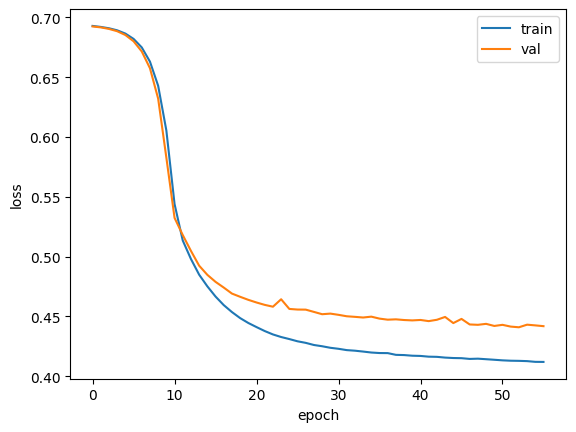

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [18]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 7s 8ms/step - loss: 0.4285 - accuracy: 0.7994


[0.4285373389720917, 0.7993599772453308]